<p style="text-align: center; font-weight: bold; font-size: 18px;">
Algoritmos de ordenamiento
</p>

#### A continuación se presenta un cuadro comparativo sobre algoritmos de ordenamiento y algunas de sus caracteristicas

| **Algoritmo**                           | **Mejor Caso** | **Promedio** | **Peor Caso** | **Estable** | **Interno / Externo** | **Ventajas**                                                                 | **Desventajas**                                                            | **Estructura que utiliza**              |
|----------------------------------------|----------------|--------------|---------------|-------------|------------------------|------------------------------------------------------------------------------|-----------------------------------------------------------------------------|-----------------------------------------|
| Ordenamiento por Inserción             | O(n)           | O(n²)        | O(n²)         | ✅ Sí        | Interno                | Eficiente para listas pequeñas o casi ordenadas                             | Muy ineficiente con listas grandes o desordenadas                          | Arreglo o lista                         |
| Ordenamiento por Intercambio (Burbuja) | O(n)           | O(n²)        | O(n²)         | ✅ Sí        | Interno                | Muy fácil de implementar                                                     | Extremadamente lento en grandes volúmenes de datos                         | Arreglo                                 |
| Ordenamiento por Selección             | O(n²)          | O(n²)        | O(n²)         | ❌ No        | Interno                | Menor número de intercambios, sencillo de implementar                        | No es estable, poco eficiente en general                                   | Arreglo                                 |
| Ordenamiento por Mezcla (Merge Sort)   | O(n log n)     | O(n log n)   | O(n log n)    | ✅ Sí        | Interno                | Estable, buen rendimiento en conjuntos grandes                               | Usa memoria adicional (no es in-place)                                     | Arreglo o lista                         |
| Ordenamiento por Distribución (Radix)  | O(n·k)         | O(n·k)       | O(n·k)        | ✅ Sí        | Interno                | Muy rápido con claves numéricas pequeñas y uniformes                         | No es comparativo, depende del tamaño y tipo de claves                     | Arreglo (y colas para los buckets)      |
| Externo por Mezcla Multi-vía           | O(n log n)     | O(n log n)   | O(n log n)    | ✅ Sí        | Externo                | Ideal para grandes volúmenes de datos que no caben en RAM                   | Implementación compleja, depende del sistema de archivos                  | Archivos y buffers (memoria secundaria) |


## *Algoritmo de ordenamieto por selección*

In [4]:
def selection_sort(arr):
    """
    Retorna la lista ordenada, el número de comparaciones y el número de intercambios.
    """
    n = len(arr)
    comparisons = 0
    swaps = 0

    for i in range(n):
        # Encontrar el elemento mínimo en el resto de la lista no ordenada
        min_idx = i
        for j in range(i + 1, n):
            comparisons += 1
            if arr[j] < arr[min_idx]:
                min_idx = j

        # Intercambiar el elemento mínimo encontrado con el primer elemento de la porción no ordenada
        if min_idx != i:
            arr[i], arr[min_idx] = arr[min_idx], arr[i]
            swaps += 1
    return arr, comparisons, swaps

In [3]:
def merge_sort(arr):
    """
    Retorna la lista ordenada, el número de comparaciones y el número de fusiones.
    """
    comparisons = 0
    merges = 0

    if len(arr) > 1:
        mid = len(arr) // 2  # Encontrar el punto medio de la lista
        left_half = arr[:mid]  # Dividir la lista en dos mitades
        right_half = arr[mid:]

        # Llamadas recursivas para ordenar ambas mitades
        # Acumulamos las comparaciones y fusiones de las llamadas recursivas
        left_half, comp_left, merges_left = merge_sort(left_half)
        right_half, comp_right, merges_right = merge_sort(right_half)

        comparisons += comp_left + comp_right
        merges += merges_left + merges_right

        i = j = k = 0

        # Fusionar las dos mitades ordenadas
        while i < len(left_half) and j < len(right_half):
            comparisons += 1
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1

        # Copiar los elementos restantes de left_half (si los hay)
        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1

        # Copiar los elementos restantes de right_half (si los hay)
        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1

        merges += 1 # Contamos una fusión principal por cada llamada que realiza la mezcla

    return arr, comparisons, merges

### *A continuación se realizarán experimentos aleatorios con los algoritmos antes desarrollados*

--- Tamaño 10 ---
SelectionSort -> Tiempo: 0.0000s, Comparaciones: 45, Intercambios: 8
MergeSort     -> Tiempo: 0.0000s, Comparaciones: 25, Fusiones: 9

--- Tamaño 100 ---
SelectionSort -> Tiempo: 0.0003s, Comparaciones: 4950, Intercambios: 96
MergeSort     -> Tiempo: 0.0002s, Comparaciones: 532, Fusiones: 99

--- Tamaño 500 ---
SelectionSort -> Tiempo: 0.0074s, Comparaciones: 124750, Intercambios: 495
MergeSort     -> Tiempo: 0.0008s, Comparaciones: 3854, Fusiones: 499

--- Tamaño 1000 ---
SelectionSort -> Tiempo: 0.0310s, Comparaciones: 499500, Intercambios: 988
MergeSort     -> Tiempo: 0.0020s, Comparaciones: 8730, Fusiones: 999

--- Tamaño 2000 ---
SelectionSort -> Tiempo: 0.1142s, Comparaciones: 1999000, Intercambios: 1989
MergeSort     -> Tiempo: 0.0036s, Comparaciones: 19407, Fusiones: 1999



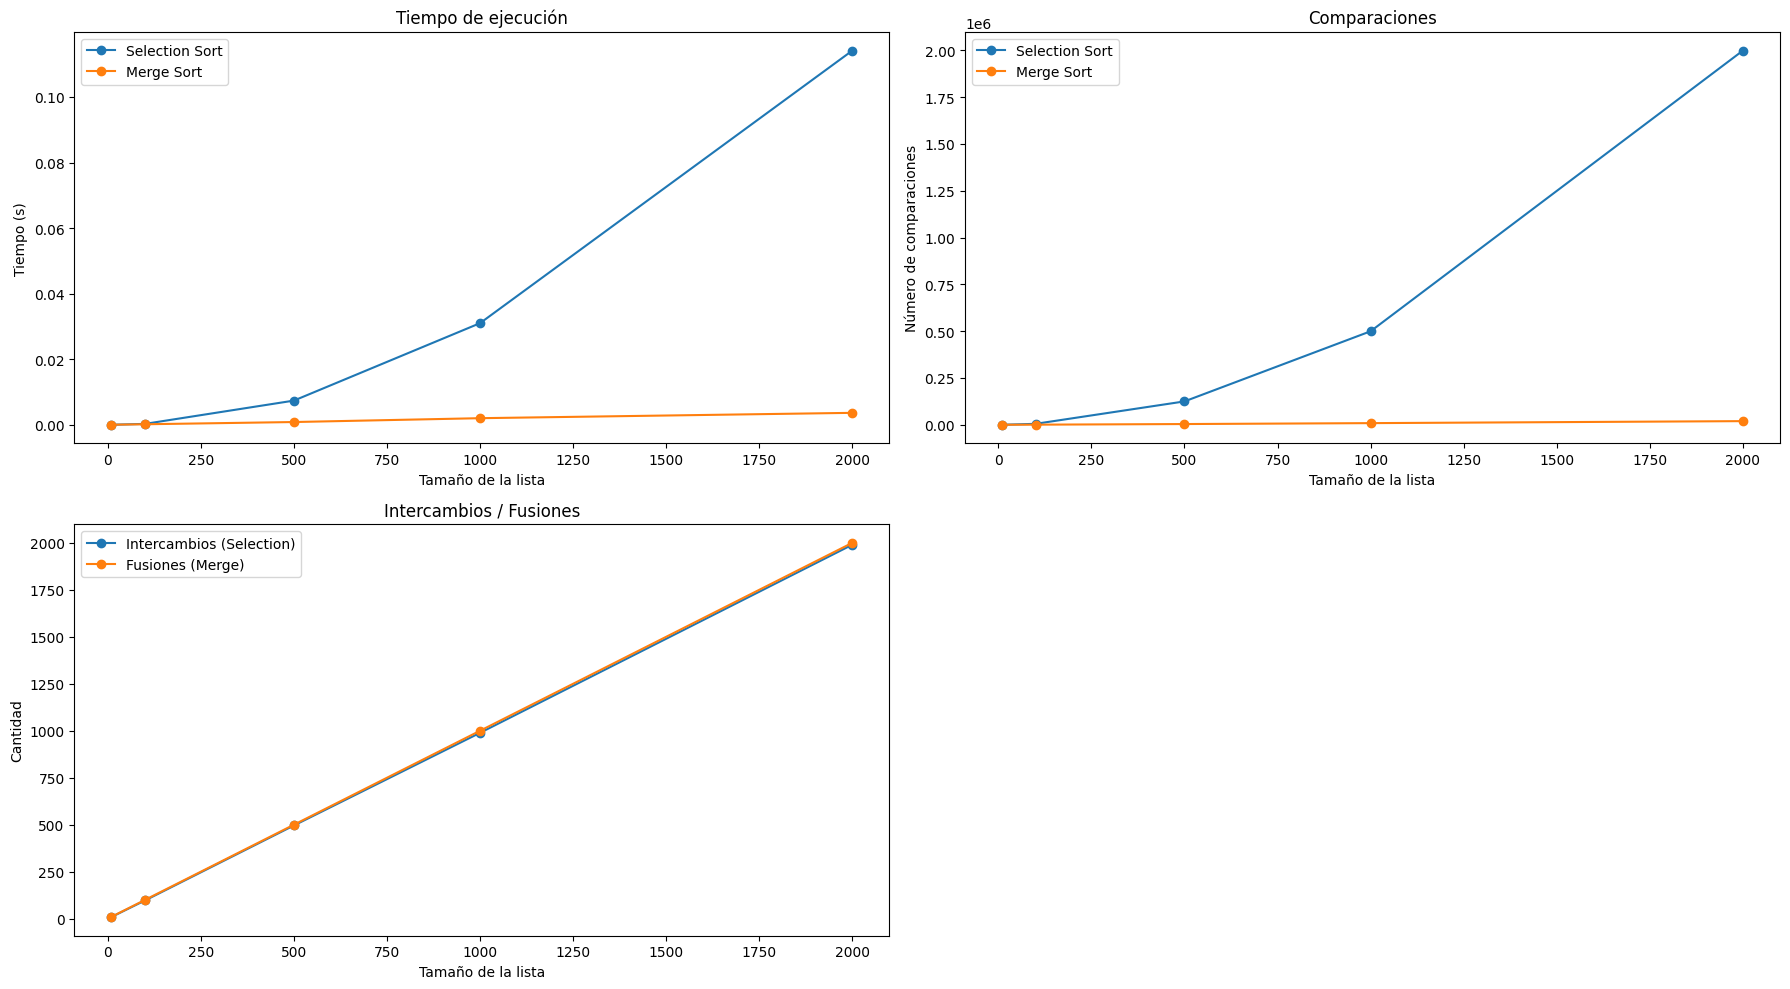

In [8]:
import random
import time
import matplotlib.pyplot as plt
def test_algorithms():
    sizes = [10, 100, 500, 1000, 2000]
    results = {
        "size": [],
        "selection_time": [],
        "selection_comparisons": [],
        "selection_swaps": [],
        "merge_time": [],
        "merge_comparisons": [],
        "merge_merges": []
    }

    for size in sizes:
        original = random.sample(range(size * 10), size)

        # Selection Sort
        arr_sel = original[:]
        start_sel = time.time()
        _, comp_sel, swaps_sel = selection_sort(arr_sel)
        time_sel = time.time() - start_sel

        # Merge Sort
        arr_mer = original[:]
        start_mer = time.time()
        _, comp_mer, merges_mer = merge_sort(arr_mer)
        time_mer = time.time() - start_mer

        # Guardar resultados
        results["size"].append(size)
        results["selection_time"].append(time_sel)
        results["selection_comparisons"].append(comp_sel)
        results["selection_swaps"].append(swaps_sel)
        results["merge_time"].append(time_mer)
        results["merge_comparisons"].append(comp_mer)
        results["merge_merges"].append(merges_mer)

        print(f"--- Tamaño {size} ---")
        print(f"SelectionSort -> Tiempo: {time_sel:.4f}s, Comparaciones: {comp_sel}, Intercambios: {swaps_sel}")
        print(f"MergeSort     -> Tiempo: {time_mer:.4f}s, Comparaciones: {comp_mer}, Fusiones: {merges_mer}")
        print()

    return results

def plot_comparison(results):
    sizes = results["size"]

    plt.figure(figsize=(18, 10))

    # Tiempo
    plt.subplot(2, 2, 1)
    plt.plot(sizes, results["selection_time"], marker='o', label="Selection Sort")
    plt.plot(sizes, results["merge_time"], marker='o', label="Merge Sort")
    plt.title("Tiempo de ejecución")
    plt.xlabel("Tamaño de la lista")
    plt.ylabel("Tiempo (s)")
    plt.legend()

    # Comparaciones
    plt.subplot(2, 2, 2)
    plt.plot(sizes, results["selection_comparisons"], marker='o', label="Selection Sort")
    plt.plot(sizes, results["merge_comparisons"], marker='o', label="Merge Sort")
    plt.title("Comparaciones")
    plt.xlabel("Tamaño de la lista")
    plt.ylabel("Número de comparaciones")
    plt.legend()

    # Intercambios vs Fusiones
    plt.subplot(2, 2, 3)
    plt.plot(sizes, results["selection_swaps"], marker='o', label="Intercambios (Selection)")
    plt.plot(sizes, results["merge_merges"], marker='o', label="Fusiones (Merge)")
    plt.title("Intercambios / Fusiones")
    plt.xlabel("Tamaño de la lista")
    plt.ylabel("Cantidad")
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    results = test_algorithms()
    plot_comparison(results)

<p style="text-align: center; font-weight: bold; font-size: 18px;">
Análisis de rendimiento selection-sort vs merge-sort
</p>
El análisis realizado compara el rendimiento de los algoritmos Selection Sort y Merge Sort en función del tamaño de la entrada, evaluando el tiempo de ejecución y el número de comparaciones realizadas.

Los resultados muestran que Merge Sort supera ampliamente a Selection Sort a medida que crece el tamaño de la lista. Mientras que Selection Sort presenta un crecimiento cuadrático tanto en tiempo como en número de comparaciones, Merge Sort mantiene un comportamiento más eficiente, cercano a n log n.

En listas pequeñas ambos algoritmos ofrecen tiempos similares, pero a partir de tamaños intermedios la diferencia es evidente. Por ejemplo, para una entrada de 2000 elementos, Selection Sort realiza cerca de 2 millones de comparaciones, mientras que Merge Sort utiliza menos de 20 mil.

Esta diferencia se refleja también en el tiempo de ejecución, donde Merge Sort es consistentemente más rápido, escalando mejor y mostrando curvas de crecimiento mucho más suaves en las gráficas generadas.

En conclusión, Merge Sort es significativamente más eficiente y escalable que Selection Sort, lo que lo hace más adecuado para entradas de gran tamaño y aplicaciones que requieren un rendimiento óptimo.


## Aloritmo de ordenamiento externo MULTI-WAY-MERGING
### A continuación se creará una clase con las funciones necesarias para el experimento

In [12]:
import os
import heapq # Para la mezcla multi-vía eficiente

class ExternalMultiwayMergeSort:
    def __init__(self, input_file_path, output_file_path, ram_limit_elements=1000, num_merge_ways=5):
        """
        Args:
            input_file_path (str): Ruta del archivo de entrada a ordenar.
            output_file_path (str): Ruta del archivo donde se guardará el resultado ordenado.
            ram_limit_elements (int): Número máximo de elementos que pueden caber en RAM para una corrida.
                                      Esto simula la limitación de memoria.
            num_merge_ways (int): Número de archivos/corridas a fusionar simultáneamente.
                                  Debe ser > 1.
        """
        self.input_file = input_file_path
        self.output_file = output_file_path
        self.ram_limit = ram_limit_elements
        self.num_merge_ways = num_merge_ways
        self.temp_dir = "temp_runs" # Directorio para almacenar las corridas temporales
        os.makedirs(self.temp_dir, exist_ok=True)

    def _read_block(self, file_object):
        """
        Lee un bloque de elementos del archivo hasta el límite de RAM o el final del archivo.
        """
        block = []
        for _ in range(self.ram_limit):
            line = file_object.readline()
            if not line:
                break
            try:
                block.append(int(line.strip()))
            except ValueError:
                # Manejar líneas no numéricas o vacías si es necesario
                continue
        return block

    def _write_run(self, run_data, run_id):
        """
        Escribe una corrida ordenada a un archivo temporal.
        """
        run_file_path = os.path.join(self.temp_dir, f"run_{run_id}.txt")
        with open(run_file_path, 'w') as f:
            for item in run_data:
                f.write(str(item) + '\n')
        return run_file_path

    def _create_runs(self):
        """
        Fase 1: Crea corridas ordenadas a partir del archivo de entrada.
        """
        print("\n--- Fase 1: Creación de Corridas ---")
        run_files = []
        run_id = 0
        with open(self.input_file, 'r') as infile:
            while True:
                block = self._read_block(infile)
                if not block:
                    break
                block.sort() # Ordena el bloque en memoria
                run_file = self._write_run(block, run_id)
                run_files.append(run_file)
                print(f"Corrida {run_id} creada: {len(block)} elementos.")
                run_id += 1
        return run_files

    def _merge_runs(self, input_run_files, output_file):
        """
        Fase 2: Fusiona múltiples corridas de entrada en un archivo de salida.
        """
        print(f"\n--- Fase 2: Fusión de {len(input_run_files)} Corridas ---")
        if not input_run_files:
            return None

        # Usar un min-heap para la mezcla eficiente
        min_heap = []
        file_handles = []

        try:
            # Abrir todas las corridas de entrada y leer el primer elemento
            for i, run_file in enumerate(input_run_files):
                f = open(run_file, 'r')
                file_handles.append(f)
                first_line = f.readline()
                if first_line:
                    item = int(first_line.strip())
                    heapq.heappush(min_heap, (item, i)) # (valor, índice_del_archivo)

            # Archivo de salida para esta fase de mezcla
            with open(output_file, 'w') as outfile:
                while min_heap:
                    smallest_item, file_idx = heapq.heappop(min_heap)
                    outfile.write(str(smallest_item) + '\n')

                    # Leer el siguiente elemento del archivo del que se tomó el más pequeño
                    next_line = file_handles[file_idx].readline()
                    if next_line:
                        try:
                            next_item = int(next_line.strip())
                            heapq.heappush(min_heap, (next_item, file_idx))
                        except ValueError:
                            # Ignorar líneas inválidas
                            pass

        finally:
            # Asegurarse de cerrar todos los archivos
            for f in file_handles:
                f.close()
            # Eliminar los archivos de entrada temporales de esta fase
            for run_file in input_run_files:
                os.remove(run_file)

        return output_file

    def sort(self):
        """
        Ejecuta el proceso de ordenamiento externo completo.
        """
        print("Iniciando Ordenamiento Externo por Mezcla Multi-vía...")

        # Fase de Creación de Corridas
        initial_runs = self._create_runs()

        if not initial_runs:
            print("El archivo de entrada está vacío o no contiene datos válidos.")
            # Crear un archivo de salida vacío si no hay datos
            with open(self.output_file, 'w') as f:
                pass
            return

        # Fase de Fusión Multi-vía en pasadas sucesivas
        current_runs = initial_runs
        merge_pass = 0

        while len(current_runs) > 1:
            print(f"\n--- Pase de Fusión {merge_pass + 1} ---")
            next_runs_for_merging = []

            # Divide las corridas actuales en grupos para fusión multi-vía
            for i in range(0, len(current_runs), self.num_merge_ways):
                group_to_merge = current_runs[i : i + self.num_merge_ways]

                # Define el nombre del archivo de salida para este grupo
                if len(current_runs) <= self.num_merge_ways:
                    # Si es la última pasada de fusión, el resultado va al archivo final
                    output_run_file = self.output_file
                else:
                    output_run_file = os.path.join(self.temp_dir, f"merged_pass_{merge_pass}_group_{i//self.num_merge_ways}.txt")

                print(f"  Fusionando {len(group_to_merge)} corridas en '{os.path.basename(output_run_file)}'...")
                merged_output = self._merge_runs(group_to_merge, output_run_file)
                if merged_output:
                    next_runs_for_merging.append(merged_output)

            current_runs = next_runs_for_merging
            merge_pass += 1

            # Si solo queda un archivo y no es el output_file final, significa que
            # se fusionó a un archivo temporal y necesitamos moverlo/renombrarlo
            if len(current_runs) == 1 and current_runs[0] != self.output_file:
                # Si llegamos aquí y es el último archivo, debemos renombrarlo al archivo de salida final
                os.rename(current_runs[0], self.output_file)
                current_runs = [self.output_file] # Actualiza la lista para salir del bucle

        print(f"\nOrdenamiento completado. Resultado en: {self.output_file}")

        # Limpiar el directorio temporal al final (opcional, útil para pruebas)
        self.cleanup_temp_dir()

    def cleanup_temp_dir(self):
        """
        Elimina el directorio temporal y sus contenidos.
        """
        if os.path.exists(self.temp_dir):
            import shutil
            shutil.rmtree(self.temp_dir)
            print(f"Directorio temporal '{self.temp_dir}' eliminado.")

#### La siguiente función nos permite medir el tiempo de ejecución del experimento

In [13]:
import time

def test_external_sort(input_file, output_file, ram_limit, merge_ways):
    sorter = ExternalMultiwayMergeSort(input_file, output_file, ram_limit, merge_ways)

    start_time = time.time()
    sorter.sort()
    duration = time.time() - start_time

    return duration


#### Esta función genera los archivos de entrada necesarios para el experimetno

In [15]:
import random

def create_test_data(file_name, num_elements, min_val, max_val):
    """
    Crea un archivo de texto con números aleatorios.
    Verifica si el archivo ya existe antes de crearlo.
    """
    # Verificar si el archivo ya existe
    if os.path.exists(file_name):
        print(f"¡Advertencia! El archivo '{file_name}' ya existe.")
        respuesta = input("¿Deseas sobrescribirlo? (s/n): ").lower().strip()

        if respuesta not in ['s', 'si', 'sí', 'y', 'yes']:
            print("Operación cancelada. No se modificó el archivo existente.")
            return False  # Retorna False para indicar que no se creó el archivo
    try:
        with open(file_name, 'w') as f:
            for _ in range(num_elements):
                f.write(str(random.randint(min_val, max_val)) + '\n')
        return True  # Retorna True para indicar éxito

    except Exception as e:
        print(f"Error al crear el archivo: {e}")
        return False


#### Realizamos el experimento con 3 tamaños diferentes 

In [16]:
ram_limit = 6000
merge_ways = 1000

files = [("entrada_10k.txt", "salida_10k.txt"),
         ("entrada_50k.txt", "salida_50k.txt"),
         ("entrada_100k.txt", "salida_100k.txt")]

sizes = [10000, 50000, 100000]

for size in sizes:
    create_test_data(f"entrada_{round(size/1000)}k.txt", size, 0, 1000000)

resultados = {
    "Tamaño de entrada": [],
    "Tiempo de ejecución (s)": []
}

for entrada, salida in files:
    size = sum(1 for _ in open(entrada))
    print(f"\nProbando archivo de tamaño: {size}")
    tiempo = test_external_sort(entrada, salida, ram_limit, merge_ways)
    resultados["Tamaño de entrada"].append(size)
    resultados["Tiempo de ejecución (s)"].append(tiempo)



Probando archivo de tamaño: 10000
Iniciando Ordenamiento Externo por Mezcla Multi-vía...

--- Fase 1: Creación de Corridas ---
Corrida 0 creada: 6000 elementos.
Corrida 1 creada: 4000 elementos.

--- Pase de Fusión 1 ---
  Fusionando 2 corridas en 'salida_10k.txt'...

--- Fase 2: Fusión de 2 Corridas ---

Ordenamiento completado. Resultado en: salida_10k.txt
Directorio temporal 'temp_runs' eliminado.

Probando archivo de tamaño: 50000
Iniciando Ordenamiento Externo por Mezcla Multi-vía...

--- Fase 1: Creación de Corridas ---
Corrida 0 creada: 6000 elementos.
Corrida 1 creada: 6000 elementos.
Corrida 2 creada: 6000 elementos.
Corrida 3 creada: 6000 elementos.
Corrida 4 creada: 6000 elementos.
Corrida 5 creada: 6000 elementos.
Corrida 6 creada: 6000 elementos.
Corrida 7 creada: 6000 elementos.
Corrida 8 creada: 2000 elementos.

--- Pase de Fusión 1 ---
  Fusionando 9 corridas en 'salida_50k.txt'...

--- Fase 2: Fusión de 9 Corridas ---

Ordenamiento completado. Resultado en: salida_50k

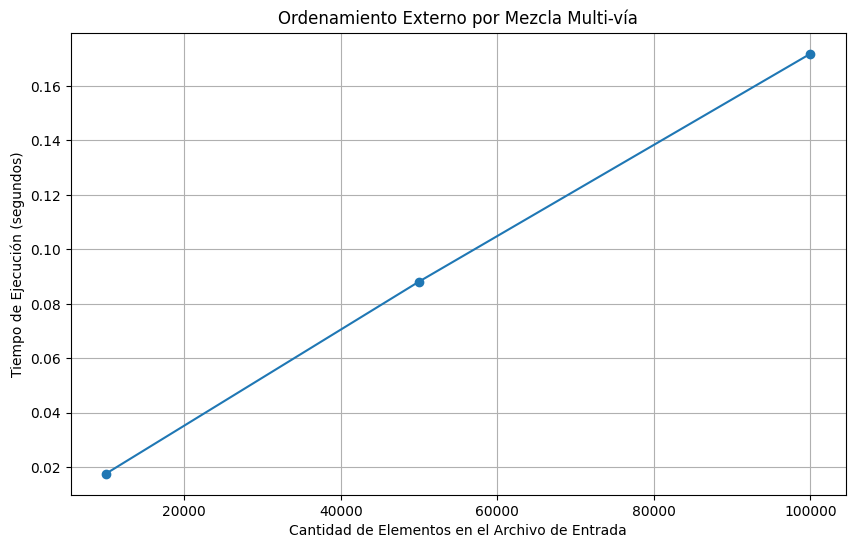

In [21]:
import matplotlib.pyplot as plt

def graficar_resultados(resultados):
    plt.figure(figsize=(10, 6))
    plt.plot(resultados["Tamaño de entrada"], resultados["Tiempo de ejecución (s)"], marker='o')
    plt.title("Ordenamiento Externo por Mezcla Multi-vía")
    plt.xlabel("Cantidad de Elementos en el Archivo de Entrada")
    plt.ylabel("Tiempo de Ejecución (segundos)")
    plt.grid(True)
    plt.show()

graficar_resultados(resultados)


In [ ]:
import random 

In [13]:
import os
import glob

# Buscar todos los archivos .txt en el directorio actual y subdirectorios
txt_files = glob.glob('**/*.txt', recursive=True)

if not txt_files:
    print("✅ No se encontraron archivos .txt")
else:
    for file in txt_files:
        try:
            os.remove(file)
            print(f"✅ Eliminado: {file}")
        except Exception as e:
            print(f"❌ Error al eliminar {file}: {str(e)}")
    print("✨ ¡Proceso completado!")

✅ Eliminado: entrada_50k.txt
✅ Eliminado: entrada_50.0k.txt
✅ Eliminado: entrada_10.0k.txt
✅ Eliminado: salida_100k.txt
✅ Eliminado: entrada_100000k.txt
✅ Eliminado: salida_50k.txt
✅ Eliminado: entrada_100.0k.txt
✅ Eliminado: entrada_100k.txt
✅ Eliminado: entrada_10000k.txt
✅ Eliminado: salida_10k.txt
✅ Eliminado: entrada_10k.txt
✅ Eliminado: entrada_50000k.txt
✨ ¡Proceso completado!
